In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [4]:
def plot_pca(df, variance=0.95, svd_solver='auto'):
    """
    Plot PCA explained variance ratio in relation to number of dimensions
    :param df: raw dataframe which will be modified
    :param variance: variance threshold
    :param svd_solver: svd solver for PCA
    :return: dataframe with selected number of dimensions, scaler and pca
    """

    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    pca = PCA(svd_solver=svd_solver)
    pca.fit(df_scaled)
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    dimension = np.argmax(cumsum >= variance) + 1

    print(f'Variance - {variance}, Dimension - {dimension}')

    explained_variance = []
    dimension_list = []

    for v in np.arange(0.01, 1.0, 0.05):
        d = np.argmax(cumsum >= v) + 1

        explained_variance.append(v)
        dimension_list.append(d)

    plt.plot(dimension_list, explained_variance)
    plt.axvline(x=dimension, color='red', linestyle='--', label=f'Best {dimension}')
    plt.xlabel("Number of Dimension")
    plt.ylabel("Variance Explained")
    plt.grid(alpha=0.2)
    plt.legend()
    plt.show()

In [5]:
X, _ = make_classification(n_samples=100, n_features=20, random_state=42)
df = pd.DataFrame(X)

Variance - 0.9, Dimension - 15


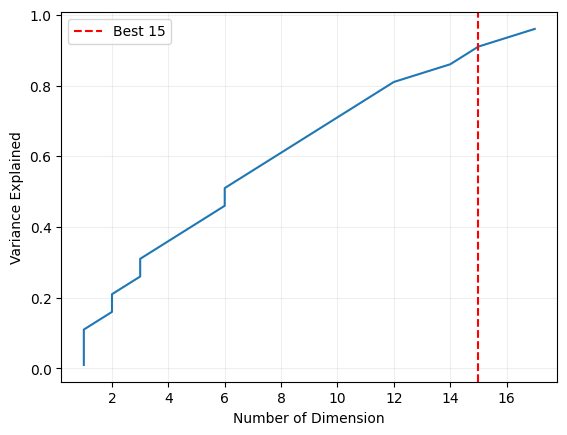

In [6]:
plot_pca(df, variance=0.9, svd_solver='auto')